In [15]:
import catboost as cb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
review_df=pd.read_csv("hospital_review_afterpreprocessed.csv", index_col=[0])

In [17]:
review_df['star'].isna().sum()

0

In [18]:
review_df.shape

(205, 3)

In [19]:
review_df.isna().sum()

star                   0
review_content         0
review_preprocessed    0
dtype: int64

#### Prediction for review ratings (catboost regressor)

In [20]:
train_df, test_df = train_test_split(review_df, test_size = 0.2, random_state=1)

In [21]:
vectorizer =TfidfVectorizer(max_features=75,ngram_range=(1,3))
train_vectorized_data=vectorizer.fit_transform(train_df['review_preprocessed'])
test_vectorized_data = vectorizer.transform(test_df['review_preprocessed'])

In [22]:
def merge_vectorized_data(vectorized_data, df):
    vec_data_df = pd.DataFrame(vectorized_data.toarray(), columns = vectorizer.get_feature_names_out())
    vec_data_df.index = df['review_content']
    vec_data_df = vec_data_df.reset_index()
    df = df.merge(vec_data_df, how='left', on="review_content")
    return df

In [23]:
train_vectorized_df = merge_vectorized_data(train_vectorized_data, train_df)
test_vectorized_df = merge_vectorized_data(test_vectorized_data, test_df)

In [24]:
train_vectorized_df

,star,review_content,review_preprocessed,absolutely,also,always,amazing,appointment,back,bad,...,wait,ward,week,well,went,work,working,would,york,york hospital
0,5,Always worth 6 stars. Great.,always worth 6 star great,0.0,0.000000,0.699161,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,5,I was given an epidural by dr hall of the day ...,given epidural doctor hall day unit felt littl...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.288187,0.000000
2,5,Have been to a lot of hospital in my time and ...,lot hospital time week ward life opinion good ...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.368534,0.457849,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3,5,"From the ambulance to ward 22, everything was ...",ambulance ward 22 everything 5 treatment nurse...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.364306,0.000000,0.0,0.0,0.0,0.452595,0.000000,0.000000,0.000000
4,4,Friendly and efficient medical staff make your...,friendly efficient medical staff make visit be...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,5,Was ok I was a little worried to go to York ho...,ok little worried go york hospital appointment...,0.0,0.000000,0.000000,0.0,0.388325,0.0,0.423771,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.316994,0.349872
160,5,Nice people,nice people,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
161,5,A big thank you to the ambulance paramedics wh...,big thank ambulance paramedic got hospital e d...,0.0,0.260025,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.209301,0.000000,0.0,0.0,0.0,0.000000,0.212637,0.000000,0.000000
162,5,Excellent place,excellent place,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000


In [25]:
X_train= train_vectorized_df.iloc[:,3:]
X_test = test_vectorized_df.iloc[:,3:]
y_train = train_vectorized_df['star']
y_test= test_vectorized_df['star']

In [26]:
X_train

,absolutely,also,always,amazing,appointment,back,bad,best,better,brilliant,...,wait,ward,week,well,went,work,working,would,york,york hospital
0,0.0,0.000000,0.699161,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.288187,0.000000
2,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.368534,0.457849,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.364306,0.000000,0.0,0.0,0.0,0.452595,0.000000,0.000000,0.000000
4,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.572109,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.0,0.000000,0.000000,0.0,0.388325,0.0,0.423771,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.316994,0.349872
160,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
161,0.0,0.260025,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.209301,0.000000,0.0,0.0,0.0,0.000000,0.212637,0.000000,0.000000
162,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000


In [27]:
model = cb.CatBoostRegressor()

In [28]:
model.fit(X_train, y_train)

Learning rate set to 0.03077
0:	learn: 1.5149425	total: 12.8ms	remaining: 12.8s
1:	learn: 1.5052521	total: 16.5ms	remaining: 8.24s
2:	learn: 1.4942033	total: 20.3ms	remaining: 6.75s
3:	learn: 1.4819550	total: 24.8ms	remaining: 6.17s
4:	learn: 1.4714925	total: 28.8ms	remaining: 5.74s
5:	learn: 1.4644231	total: 32.6ms	remaining: 5.39s
6:	learn: 1.4572174	total: 35.9ms	remaining: 5.1s
7:	learn: 1.4471777	total: 41.5ms	remaining: 5.14s
8:	learn: 1.4348677	total: 45ms	remaining: 4.96s
9:	learn: 1.4263273	total: 48.5ms	remaining: 4.8s
10:	learn: 1.4174172	total: 52.3ms	remaining: 4.7s
11:	learn: 1.4111107	total: 58ms	remaining: 4.78s
12:	learn: 1.4063605	total: 61.4ms	remaining: 4.66s
13:	learn: 1.3997814	total: 64.6ms	remaining: 4.55s
14:	learn: 1.3913867	total: 69.4ms	remaining: 4.56s
15:	learn: 1.3853930	total: 74.2ms	remaining: 4.56s
16:	learn: 1.3771592	total: 77.7ms	remaining: 4.5s
17:	learn: 1.3692662	total: 81.4ms	remaining: 4.44s
18:	learn: 1.3644529	total: 86ms	remaining: 4.44s
19:

In [29]:

y_pred=model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred)))
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print('mae: {:.2f}'.format(mae))
print('MSE: {:.2f}'.format(mse))
print('RMSE: {:.2f}'.format(rmse))
print('R2 Score: {:.2f}'.format(r2))

mae: 0.71
MSE: 0.94
RMSE: 0.97
R2 Score: 0.47


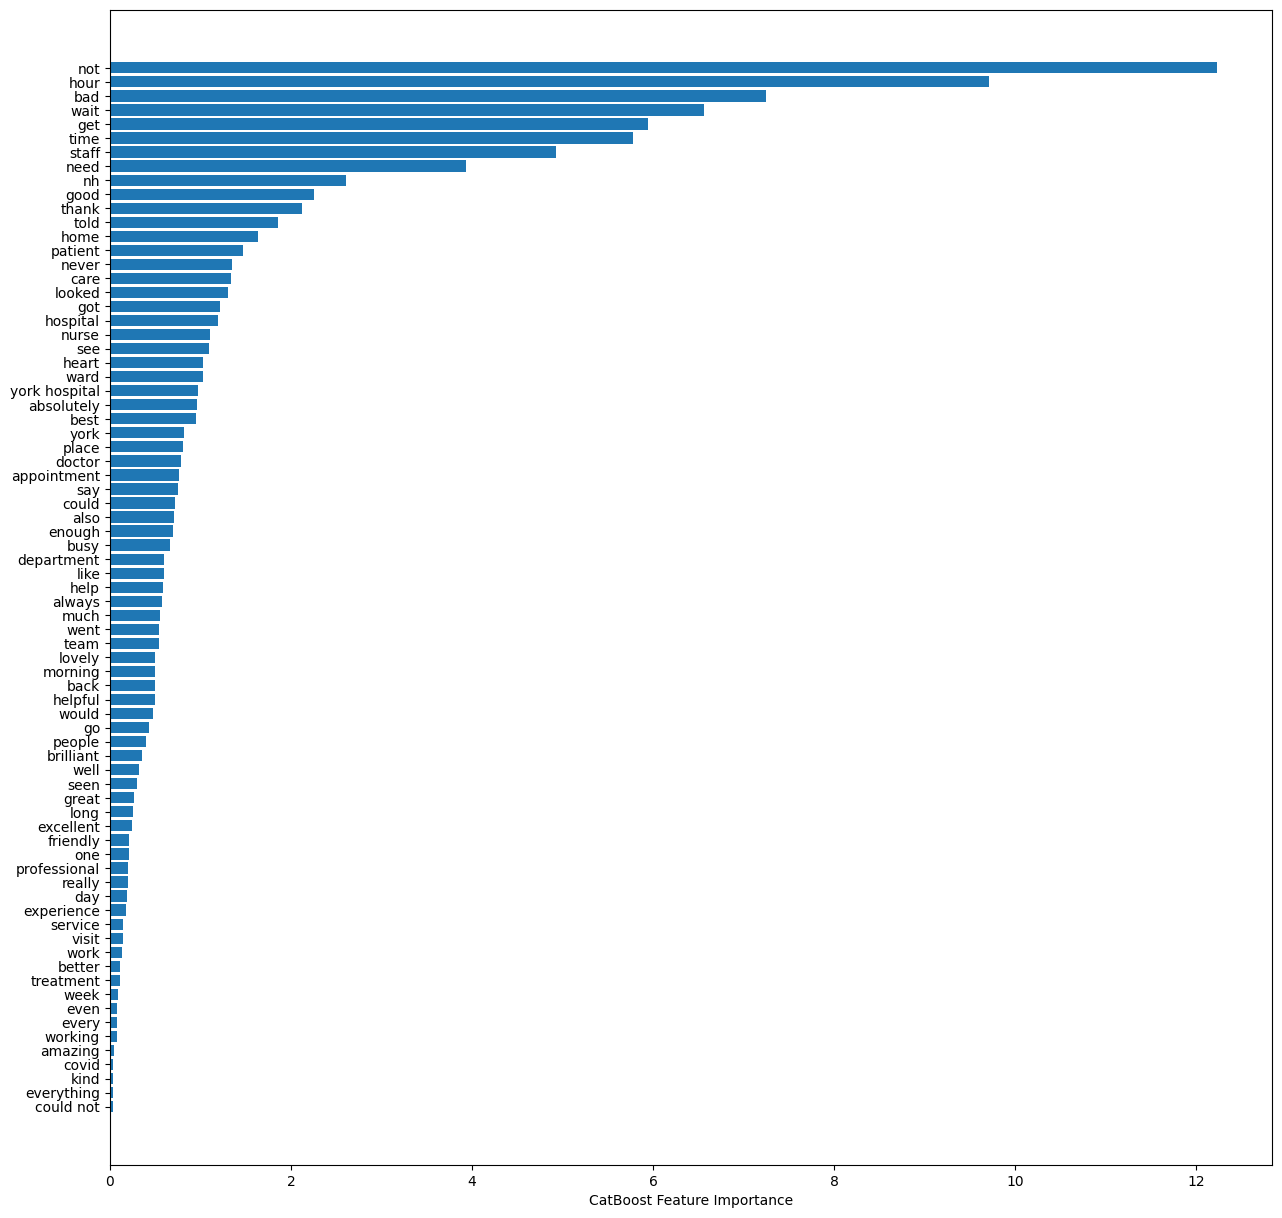

In [30]:
plt.figure(figsize =(15,15))
sorted_feature_importance = model.feature_importances_.argsort()
plt.barh(X_test.columns[sorted_feature_importance], 
        model.feature_importances_[sorted_feature_importance])
plt.xlabel("CatBoost Feature Importance");

### Parameter Tuning 1

In [31]:
model = cb.CatBoostRegressor()

In [32]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, X_train, y_train)

0:	learn: 4.1920976	test: 4.3794209	best: 4.3794209 (0)	total: 2.46ms	remaining: 244ms
1:	learn: 4.0840600	test: 4.2703256	best: 4.2703256 (1)	total: 5.55ms	remaining: 272ms
2:	learn: 3.9787627	test: 4.1623672	best: 4.1623672 (2)	total: 11.8ms	remaining: 380ms
3:	learn: 3.8783571	test: 4.0575263	best: 4.0575263 (3)	total: 14.8ms	remaining: 355ms
4:	learn: 3.7814547	test: 3.9577306	best: 3.9577306 (4)	total: 16.7ms	remaining: 318ms
5:	learn: 3.6865055	test: 3.8596343	best: 3.8596343 (5)	total: 18.7ms	remaining: 292ms
6:	learn: 3.5952480	test: 3.7637401	best: 3.7637401 (6)	total: 23.5ms	remaining: 312ms
7:	learn: 3.5075562	test: 3.6730294	best: 3.6730294 (7)	total: 26ms	remaining: 299ms
8:	learn: 3.4219248	test: 3.5827932	best: 3.5827932 (8)	total: 32.1ms	remaining: 325ms
9:	learn: 3.3408019	test: 3.4986458	best: 3.4986458 (9)	total: 39.2ms	remaining: 352ms
10:	learn: 3.2627463	test: 3.4166234	best: 3.4166234 (10)	total: 43.5ms	remaining: 352ms
11:	learn: 3.1873043	test: 3.3366873	best: 

{'params': {'depth': 8,
  'l2_leaf_reg': 3,
  'iterations': 150,
  'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,

In [33]:
y_pred=model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred)))
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print('mae: {:.2f}'.format(mae))
print('MSE: {:.2f}'.format(mse))
print('RMSE: {:.2f}'.format(rmse))
print('R2 Score: {:.2f}'.format(r2))

mae: 0.68
MSE: 0.86
RMSE: 0.92
R2 Score: 0.51


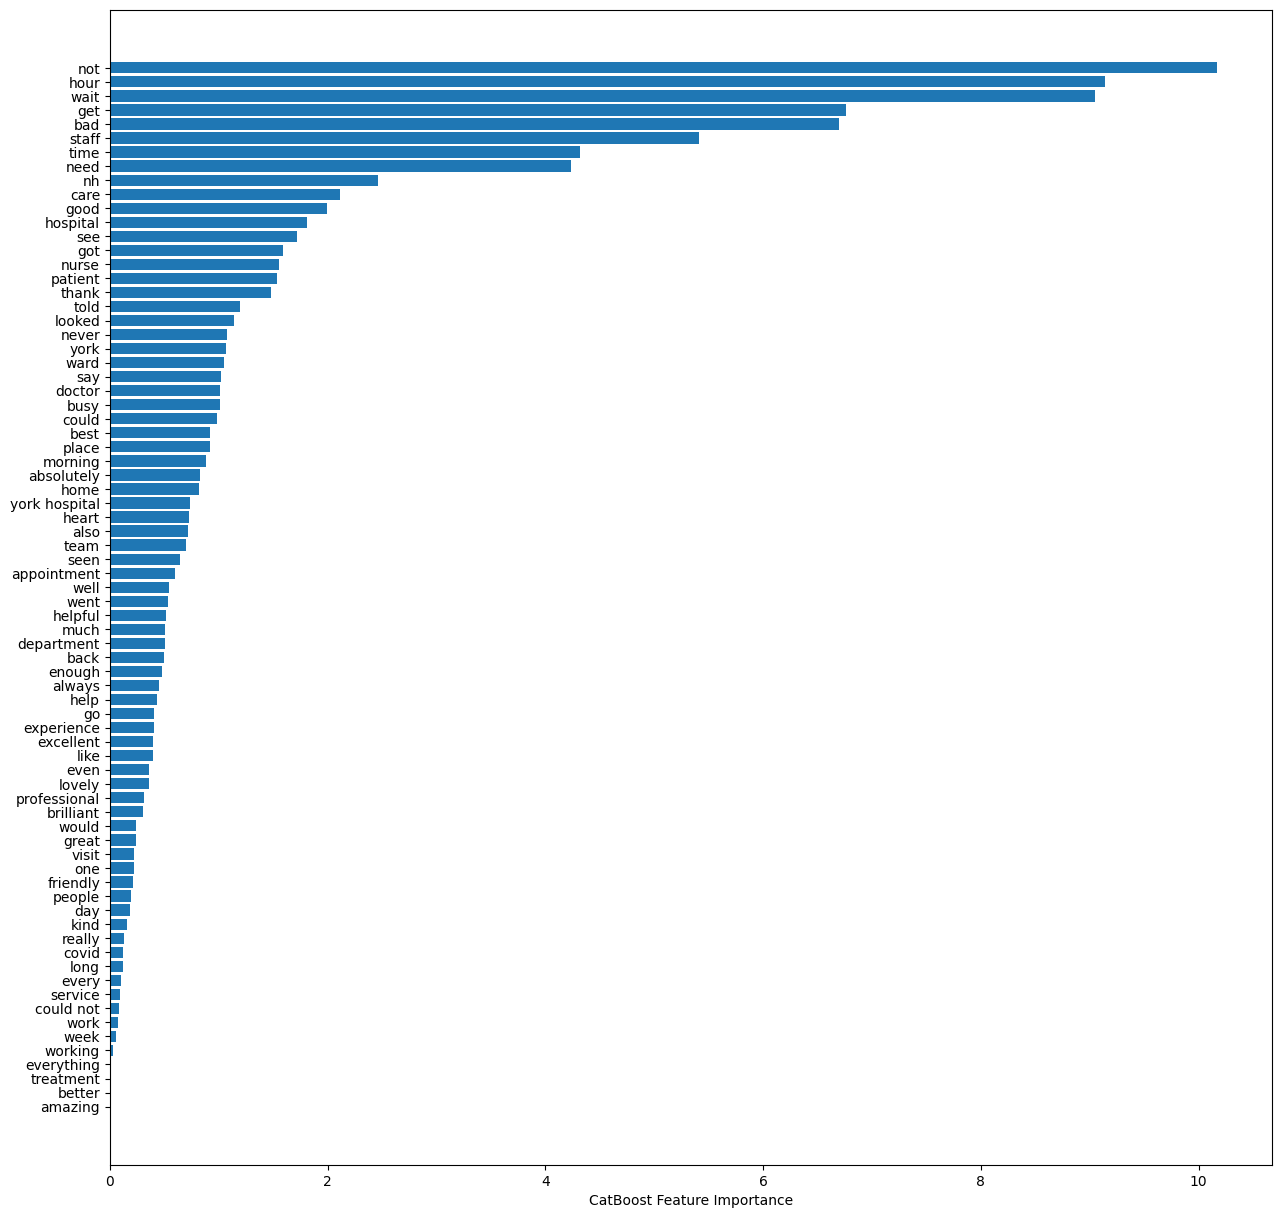

In [34]:
plt.figure(figsize =(15,15))
sorted_feature_importance = model.feature_importances_.argsort()
plt.barh(X_test.columns[sorted_feature_importance], 
        model.feature_importances_[sorted_feature_importance])
plt.xlabel("CatBoost Feature Importance");

### Parameter Tuning 2

In [39]:
model = cb.CatBoostRegressor()

In [40]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.15],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 5]}
model.grid_search(grid, X_train, y_train)

0:	learn: 4.1920976	test: 4.3794209	best: 4.3794209 (0)	total: 1.85ms	remaining: 184ms
1:	learn: 4.0840600	test: 4.2703256	best: 4.2703256 (1)	total: 3.31ms	remaining: 162ms
2:	learn: 3.9787627	test: 4.1623672	best: 4.1623672 (2)	total: 4.24ms	remaining: 137ms
3:	learn: 3.8783571	test: 4.0575263	best: 4.0575263 (3)	total: 5.07ms	remaining: 122ms
4:	learn: 3.7814547	test: 3.9577306	best: 3.9577306 (4)	total: 5.94ms	remaining: 113ms
5:	learn: 3.6865055	test: 3.8596343	best: 3.8596343 (5)	total: 6.75ms	remaining: 106ms
6:	learn: 3.5952480	test: 3.7637401	best: 3.7637401 (6)	total: 7.57ms	remaining: 101ms
7:	learn: 3.5075562	test: 3.6730294	best: 3.6730294 (7)	total: 8.37ms	remaining: 96.3ms
8:	learn: 3.4219248	test: 3.5827932	best: 3.5827932 (8)	total: 9.18ms	remaining: 92.8ms
9:	learn: 3.3408019	test: 3.4986458	best: 3.4986458 (9)	total: 10ms	remaining: 90.2ms
10:	learn: 3.2627463	test: 3.4166234	best: 3.4166234 (10)	total: 10.8ms	remaining: 87.4ms
11:	learn: 3.1873043	test: 3.3366873	be

{'params': {'depth': 8,
  'l2_leaf_reg': 5,
  'iterations': 150,
  'learning_rate': 0.15},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45

In [42]:
y_pred=model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred)))
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print('MAE: {:.2f}'.format(mae))
print('MSE: {:.2f}'.format(mse))
print('RMSE: {:.2f}'.format(rmse))
print('R2 Score: {:.2f}'.format(r2))

MAE: 0.67
MSE: 0.85
RMSE: 0.92
R2 Score: 0.51


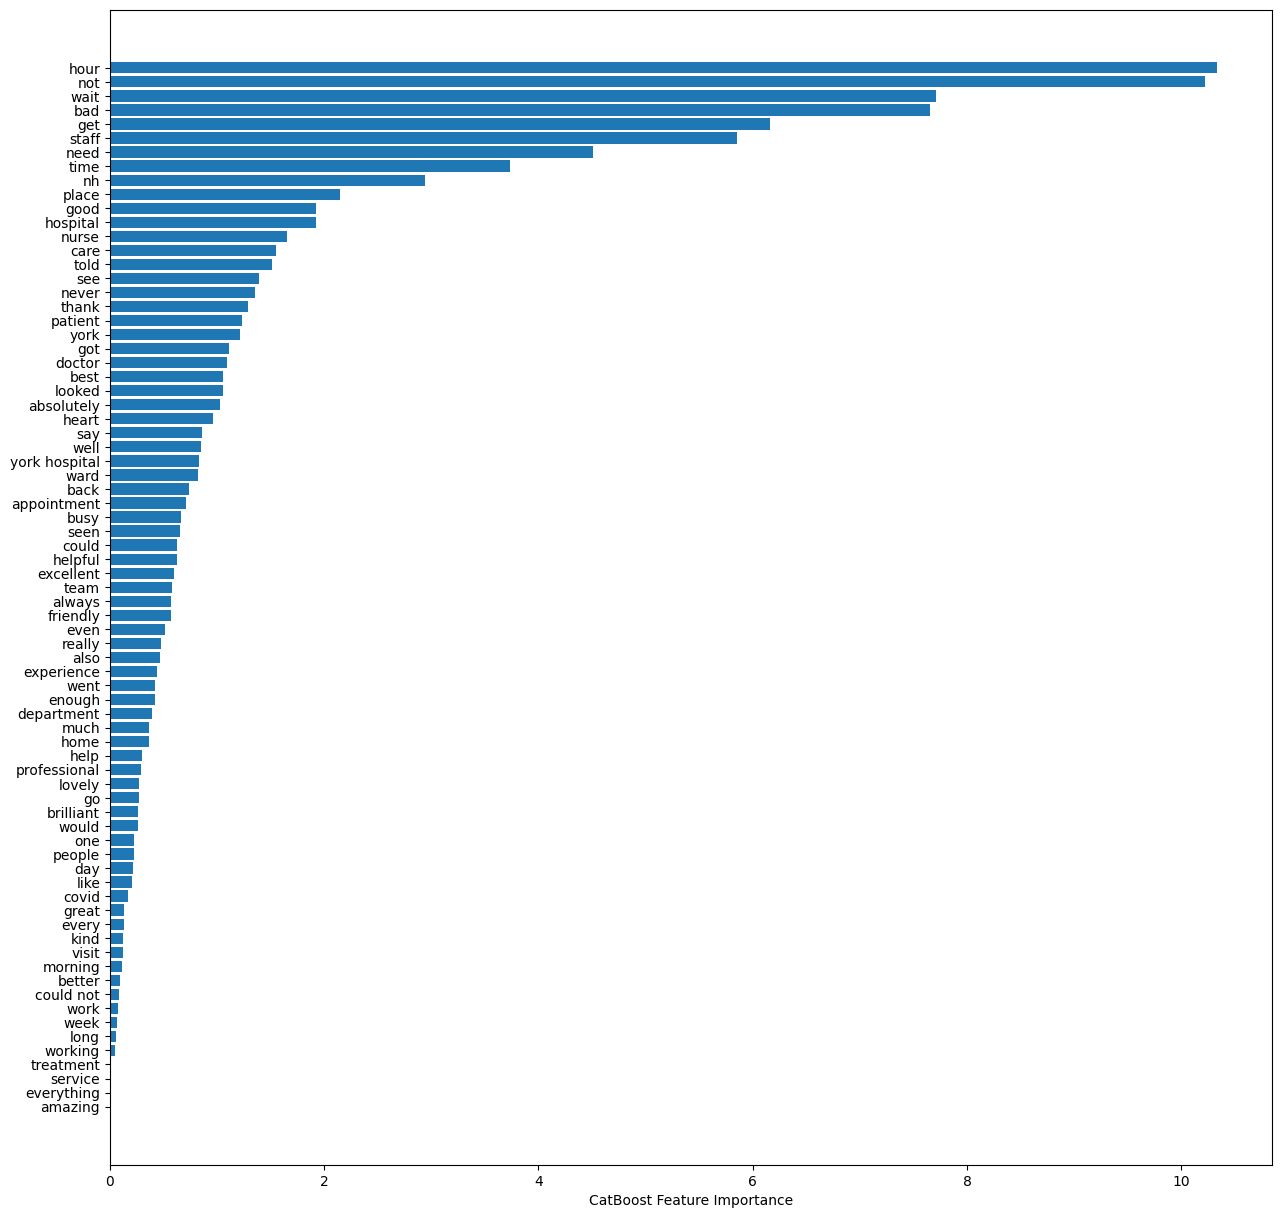

In [43]:
plt.figure(figsize =(15,15))
sorted_feature_importance = model.feature_importances_.argsort()
plt.barh(X_test.columns[sorted_feature_importance], 
        model.feature_importances_[sorted_feature_importance])
plt.xlabel("CatBoost Feature Importance");

Reference
https://towardsdatascience.com/catboost-regression-in-6-minutes-3487f3e5b329